# 1. Importing necassary libraries

In [143]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D  #Convolution layer and Pooling comes for CNN

# 2. Import Dataset || 3. Data Understanding || 4. Data Pre-processing

In [12]:
#img = keras.utils.load_img("D:\Data Science\Data sets\Image Classification\Training\Arundhathi\Snapchat-1492693124.jpg")

In [1]:
# plt.imshow(img)
# plt.show()

In [144]:
#Data Pre-processing
train_data = ImageDataGenerator(rescale=1/255)  #Normalization
test_data = ImageDataGenerator(rescale=1/255)

In [145]:
#Importing data by normalizing and then storing it in train and test images for input
train_img = train_data.flow_from_directory("D:\Data Science\Data sets\Image Classification\Training", target_size=(128,128))
test_img = train_data.flow_from_directory("D:\Data Science\Data sets\Image Classification\Testing", target_size=(128,128))

Found 30 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [146]:
train_img.image_shape,test_img.image_shape

((128, 128, 3), (128, 128, 3))

In [147]:
train_img.class_indices

{'Advaith': 0, 'Arundhathi': 1, 'Sojess': 2}

keras.preprocessing.image.DirectoryIterator

In [43]:
img_train = keras.utils.image_dataset_from_directory("D:\Data Science\Data sets\Image Classification\Training",labels="inferred")
img_test = keras.utils.image_dataset_from_directory("D:\Data Science\Data sets\Image Classification\Testing",labels="inferred")

Found 30 files belonging to 3 classes.
Found 6 files belonging to 3 classes.


# 5. Model Building

## 5.1 Building Model Architecture

In [148]:
model = Sequential()

#Input image > Convolution matrix > Feature map >--Relu--> Rectified FM > MaxPooling > Desampled FM(half sized image matrix) > Flatten > FFNN > Output

In [149]:
model.add(Conv2D(input_shape=(128,128,3), filters=16, kernel_size=(5,5), strides=1, padding='same', activation='relu'))

# filters      -- adding more layers
# kernel_size  -- specifies the height and width of the 2D convolution window
# strides      -- movement from left to right & from top to bottom - can be given as tuple(1,1) or simply an integer(like here)
# padding      -- adding 0s around the image and the same input 128x128 is preserved in FM(if image is not in center and is in corners, padding is added so that all pixels gets equal no. of coverage during conv movement over the image) or else it reduces after conv
# activation   --

model.add(MaxPool2D(pool_size=(2, 2), strides=2))
#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=1, padding='same', activation='relu'))  #More conv layers
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(5,5), strides=1, padding='same', activation='relu'))  #More conv layers
model.add(MaxPool2D(pool_size=(2, 2), strides=2))



model.add(Flatten())

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))  #Output layer

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 64)      

In [150]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# 6. Model Training

In [151]:
# model_train=
model.fit(x=train_img, epochs=10, batch_size=None, validation_data=test_img)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.0993 - accuracy: 0.4000 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 1.0537 - accuracy: 0.4000 - val_loss: 1.1582 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 1.0336 - accuracy: 0.3333 - val_loss: 1.1219 - val_accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.0030 - accuracy: 0.4333 - val_loss: 1.1142 - val_accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 0.9758 - accuracy: 0.4667 - val_loss: 1.0987 - val_accuracy: 0.1667
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.8837 - accuracy: 0.8000 - val_loss: 1.0728 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.8558 - accuracy: 0.5333 - val_loss: 1.1012 - val_accuracy: 0.3333
Epoch 8/10
1/1 [=========================

In [152]:
model.save('image_classifier.h5')

# 7. Model Prediction

In [213]:
# Part 3 - Making new predictions
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

test_image = keras.utils.load_img(r"D:\Data Science\Data sets\Image Classification\Testing\Arundhathi\Screenshot_2022-08-25-15-59-00-685_com.google.android.apps.photos.jpg", target_size = (128,128))
test_image = keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

images = np.vstack([test_image])

# load model
model = load_model('image_classifier.h5')
result = model.predict(images)

if result[0][0] == 1:
    print('Advaith')
    

elif result[0][1] ==1:
    print('Arundhathi')
    
else:
    print("Sojess")


1/1 [==============================] - 0s 136ms/step
Arundhathi


In [222]:
test_img.directory

'D:\\Data Science\\Data sets\\Image Classification\\Testing'

In [239]:
file_test=str(test_img)
os.listdir(file_test)
#file_test+'\\Arundhathi'

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: '<keras.preprocessing.image.DirectoryIterator object at 0x000001EB52FD51C0>'

In [235]:
type(file_test)

NameError: name 'file_test' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


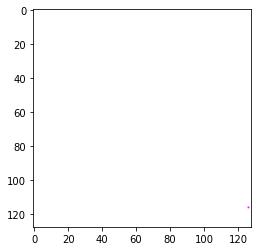

In [172]:
plt.imshow(images[0])

In [204]:
import os
dir_path = "D:\Data Science\Data sets\Image Classification\Testing"

for i in os.listdir(dir_path):
    img = keras.utils.load_img(dir_path + "\\" + i, target_size=(128,128))
    plt.imshow(img)
    plt.show()
    
#     X = keras.utils.img_to_array(img)
#     X=np.expand_dims(X,axis=0)
#     images = np.vstack([X])
    
#     val = model.predict(images)
#     val
    
#     if val==0:
#         print("Advaith")
#     elif val==1:
#         print("Arundhathi")
#     else:
#         print("Sojess")

PermissionError: [Errno 13] Permission denied: 'D:\\Data Science\\Data sets\\Image Classification\\Testing\\Advaith'

TypeError: Image data of dtype <U23 cannot be converted to float

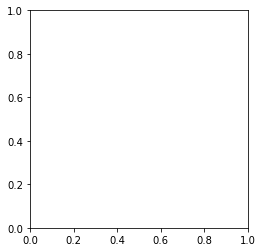

In [199]:
import os
dir_path = "D:\Data Science\Data sets\Image Classification\Testing\Advaith"
file=os.listdir(dir_path)
file=np.array(file)
plt.imshow(file)

In [190]:
for i in file:
    print(i)

IMG_20220825_160615.jpg
IMG_20220825_160633.jpg


In [193]:
type(file)

numpy.ndarray

In [200]:
file

array(['IMG_20220825_160615.jpg', 'IMG_20220825_160633.jpg'], dtype='<U23')

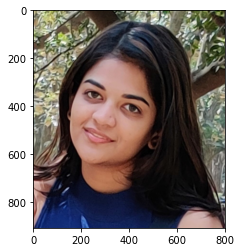

In [206]:
import matplotlib.image as mpimg

img = mpimg.imread("D:\Data Science\Data sets\Image Classification\Testing\Arundhathi\Screenshot_2022-08-25-16-02-18-543_com.google.android.apps.photos.jpg")

imgplot = plt.imshow(img)
plt.show()